# Task 3.1D: Exact policy iteration implementation for MDPs

**Objective:** " Your implementation should employ a linear system (while referring Task 1.1P) to find the exact solution for a policy that can achieve the goal. Your report, in the other hand, 
should refer to the relevant pseudocode in the your Jupyter Notebook. You are also expected to show a graphical model similar to that used in Week 3 Practical corresponding to your state and transition probabilities. Also include the average reward result over 1000 steps."

"From Task 1.1P, we have successfully managed to model the same environment as from before and this is shown below:"

## Part 1: Initializing the Gym environment

In [1]:
!pip install mdp

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 454.9/454.9 KB 8.7 MB/s eta 0:00:00


In [2]:
 from google.colab import drive
 import sys
 drive.mount('/content/drive')
 sys.path.insert(0,'/content/drive/MyDrive/Colab Notebooks/')

Mounted at /content/drive


"The following Gym Environment consists of an inverted pendulum, based on the problem presented in Task 1.1P. We have scaled this problem into an exact policy iteration implementation as shown in the below diagram. Based of the diagram, we have mentioned the tranistion probabilities as well as the rewards. "

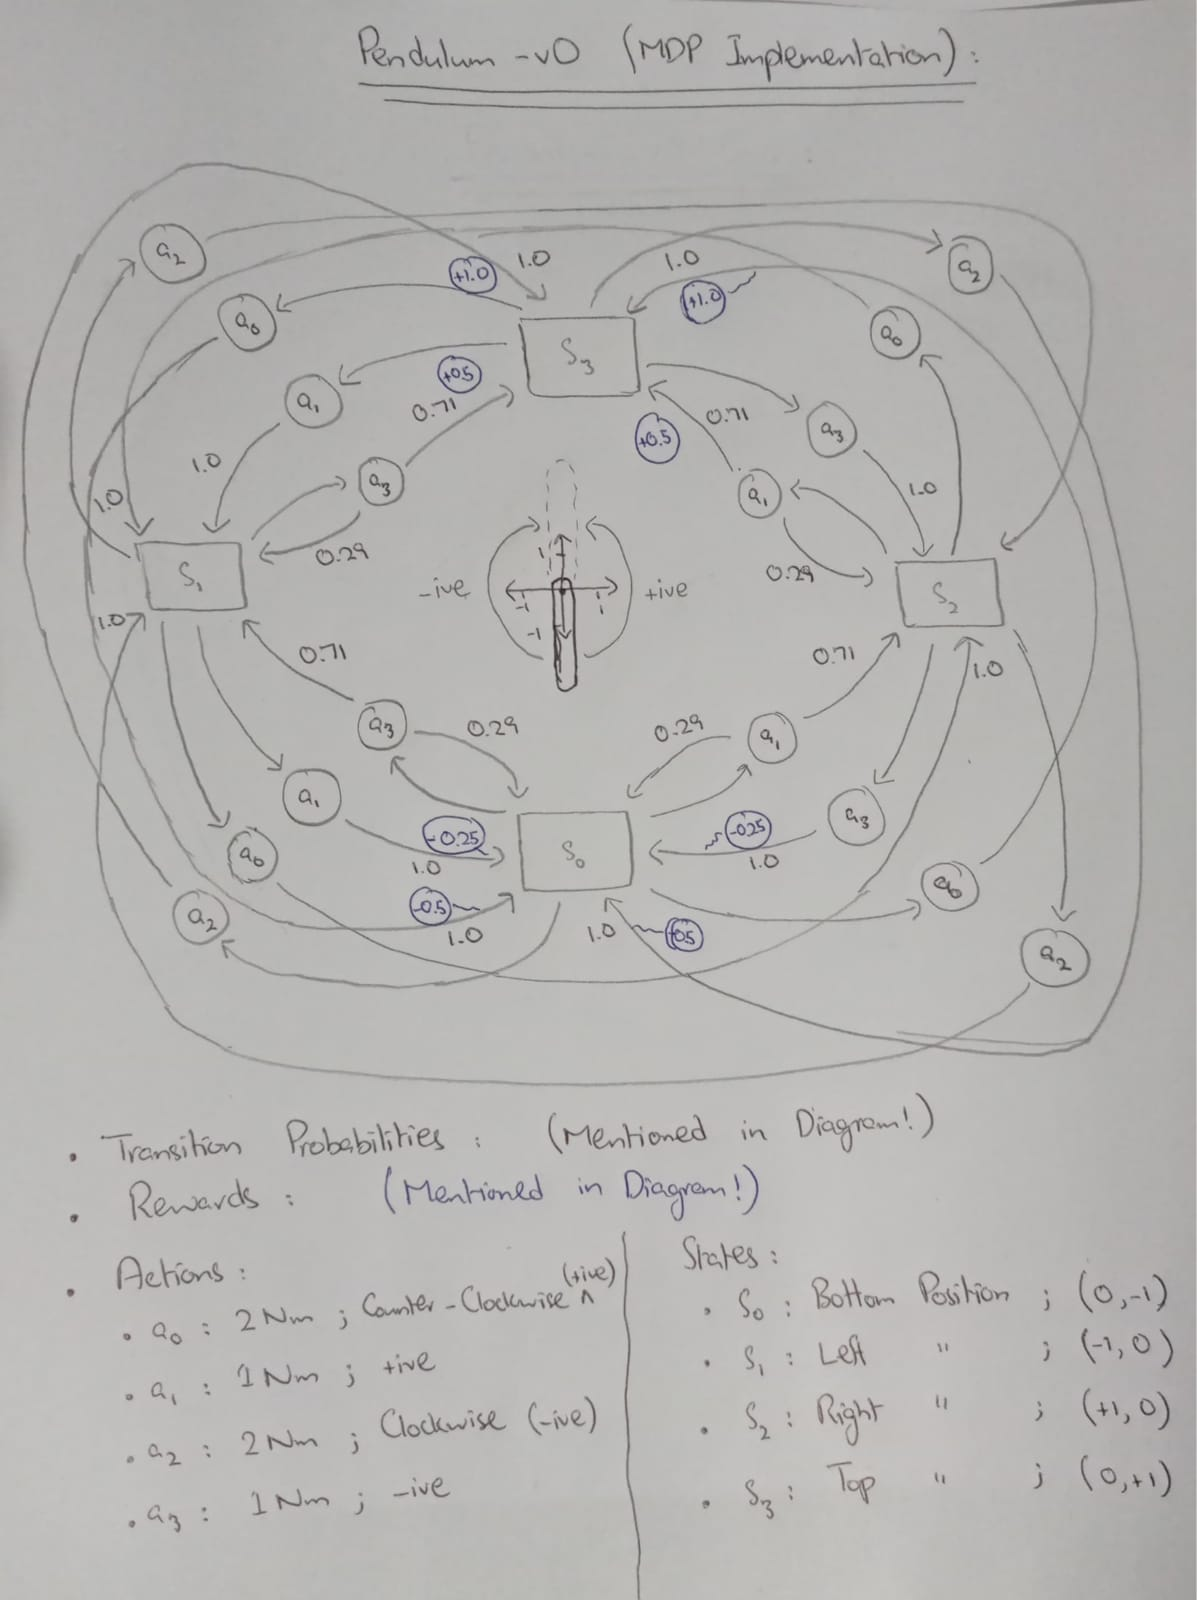

In [4]:
transition_probs = {
    's0': {
        'a0': {'s3': 1},
        'a1': {'s2': 0.71, 's0': 0.29},
        'a2': {'s3': 1},
        'a3': {'s1': 0.71, 's0': 0.29}
    },
    's1': {
        'a0': {'s2': 1},
        'a1': {'s0': 1},
        'a2': {'s2': 1},
        'a3': {'s3': 0.71, 's1': 0.29}
    },
    's2': {
        'a0': {'s1': 1},
        'a1': {'s0': 0.71, 's1': 0.29},
        'a2': {'s1': 1},
        'a3': {'s1': 1}
    },
    's3': {
        'a0': {'s0': 1},
        'a1': {'s1': 1},
        'a2': {'s0': 1},
        'a3': {'s2': 1}
    }
}
rewards = {
    's0': {'a0': {'s3': +1}},
    's0': {'a2': {'s3': +1}},
    's1': {'a1': {'s0': -0.25}},
    's1': {'a3': {'s3': +0.5}},
    's2': {'a1': {'s3': +0.5}},
    's2': {'a3': {'s0': -0.25}},
    's3': {'a0': {'s0': -0.5}},
    's3': {'a2': {'s0': -0.5}},    
}

"Now we will import the MDP Package that was already provided to us for this task..."

In [5]:
import mdp
from  W3_mdp import MDP
mdp = MDP(transition_probs, rewards, initial_state='s0')

"Now this is the part where we test our environment's working."

In [6]:
print('initial state =', mdp.reset())
next_state, reward, done, info = mdp.step('a1')
print('next_state = %s, reward = %s, done = %s' % (next_state, reward, done))

initial state = s0
next_state = s0, reward = 0.0, done = False


/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [7]:
print("mdp.get_all_states =", mdp.get_all_states())
print("mdp.get_possible_actions('s1') = ", mdp.get_possible_actions('s1'))
print("mdp.get_next_states('s1', 'a0') = ", mdp.get_next_states('s1', 'a0'))
print("mdp.get_reward('s1', 'a0', 's0') = ", mdp.get_reward('s1', 'a0', 's0'))
print("mdp.get_transition_prob('s2', 'a0', 's3') = ", mdp.get_transition_prob('s2', 'a0', 's3'))

mdp.get_all_states = ('s0', 's1', 's2', 's3')
mdp.get_possible_actions('s1') =  ('a0', 'a1', 'a2', 'a3')
mdp.get_next_states('s1', 'a0') =  {'s2': 1}
mdp.get_reward('s1', 'a0', 's0') =  0.0
mdp.get_transition_prob('s2', 'a0', 's3') =  0.0


## Part 2: Visualizing MDPs

"Now let's visualize our MDP in this section and observe whether the model implemented is the same as the above picture."

In [8]:
from W3_mdp import has_graphviz
from IPython.display import display
print("Graphviz available:", has_graphviz)

Graphviz available: True


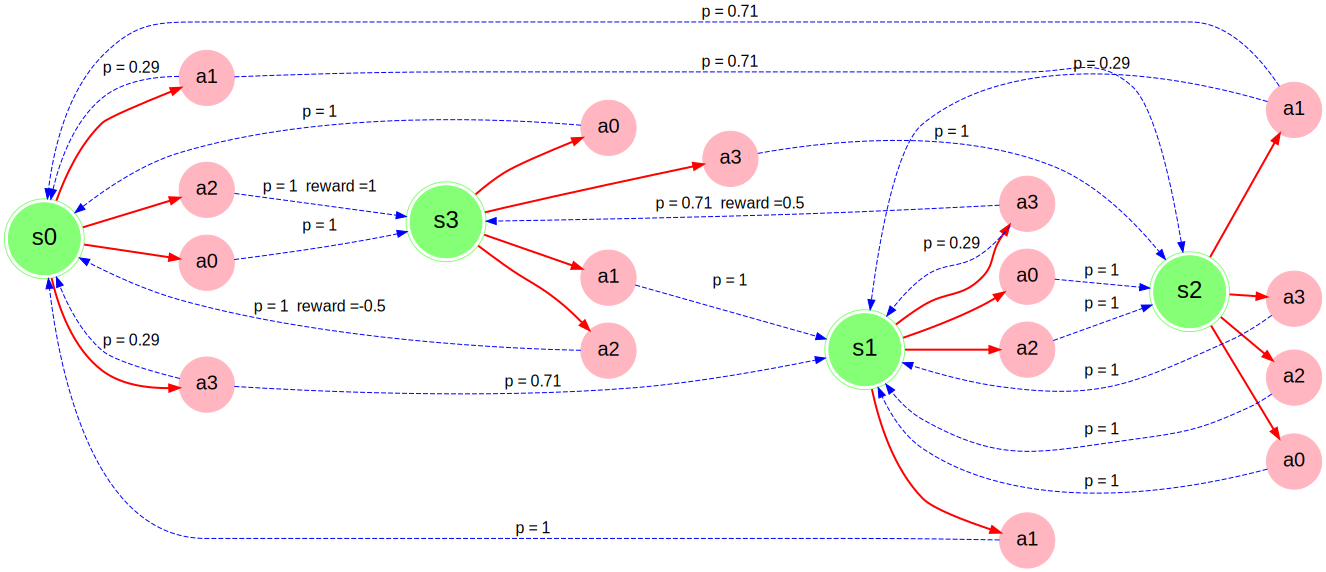

In [9]:
if has_graphviz:
    from W3_mdp import plot_graph, plot_graph_with_state_values, plot_graph_optimal_strategy_and_state_values
    display(plot_graph(mdp, graph_size='30,30'))

"As you can see, our visualization of the model has been successful. Proceeding to the next part of our expiriment."

## Part 3: Value Iteration

From Practical 3, the pseudo-code for Value Iteration is as follows:

---

`Step 1:` Initialize $V^{(0)}(s)=0$, for all $s$

`Step 2:` For $i=0, 1, 2, \dots$
 
`Step 3:` $ \quad V_{(i+1)}(s) = \max_a \sum_{s'} P(s' | s,a) \cdot [ r(s,a,s') + \gamma V_{i}(s')]$, for all $s$

---

**Step 1:** Function to compute the state-action value function $Q({\pi})$, defined as follows

$$Q_i(s, a) = \sum_{s'} P(s' | s,a) \cdot [ r(s,a,s') + \gamma V_{i}(s')]$$

**Step 2:** Using $Q(s,a)$ we can now define the "next" V(s) for value iteration.
 $$V_{i+1}(s) = \max_a \sum_{s'} P(s' | s,a) \cdot [ r(s,a,s') + \gamma V_{i}(s')] = \max_a Q_i(s,a)$$

**Step 3:** Using those $V_{i+1}(s)$ to find optimal actions in each state

 $$\pi^*(s) = argmax_a \sum_{s'} P(s' | s,a) \cdot [ r(s,a,s') + \gamma V_{i}(s')] = argmax_a Q_i(s,a)$$
 
The only difference vs V(s) is that here we take not max but argmax: find action such with maximum Q(s,a).

### **Step 1:** Function to compute the state-action value function

In [10]:
def get_action_value(mdp, state_values, present_state, action, gamma):

    # Initialise Q 
    Q = 0  
    for s in mdp.get_all_states():
      # Compute Q using the equation above
      Q = Q + mdp.get_transition_prob(present_state, action, s)*(mdp.get_reward(present_state, action, s) + gamma*state_values[s]) 
    return Q

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [11]:
#Testing the function for Step 1
import numpy as np
test_Vs = {s: i for i, s in enumerate(sorted(mdp.get_all_states()))}
print(test_Vs)
print(get_action_value(mdp, test_Vs, 's2', 'a0', 0.75))
#assert np.isclose(get_action_value(mdp, test_Vs, 's2', 'a0', 0.9), 2.34)
print(get_action_value(mdp, test_Vs, 's3', 'a0', 0.75))
#assert np.isclose(get_action_value(mdp, test_Vs, 's3', 'a0', 0.9), 0.9)

{'s0': 0, 's1': 1, 's2': 2, 's3': 3}
0.75
0.0


### **Step 2:** Using the state-action value (from Step 1) for the next state-value

In [12]:
def get_new_state_value(mdp, state_values, state, gamma):
    import numpy as np

    # Computes next V(s) as in formula above. Do not change state_values in process.
    if mdp.is_terminal(state):
        return 0

    # Initialise the dict
    A = [a for a in mdp.get_possible_actions(state)]
    v = np.zeros(len(mdp.get_possible_actions(state)))
    i = 0
    
    # Compute all possible options
    for a in mdp.get_possible_actions(state):
      v[i] = get_action_value(mdp, state_values, state, a, gamma)
      A[i] = a
      i = i+1

    # Recover V(s) and π∗(s) as per the formula above
    V = {A[np.argmax(v)]:v[np.argmax(v)]}
    
    return V

In [13]:
test_Vs_copy = dict(test_Vs)
V = get_new_state_value(mdp, test_Vs, 's0', 0.9)
print(test_Vs)
a = list(V)[0]
v = V[a]
print(a, v)
# assert np.isclose(v, 1.4)
#assert test_Vs == test_Vs_copy, "Please do not change state_values in get_new_state_value"

{'s0': 0, 's1': 1, 's2': 2, 's3': 3}
a2 3.7


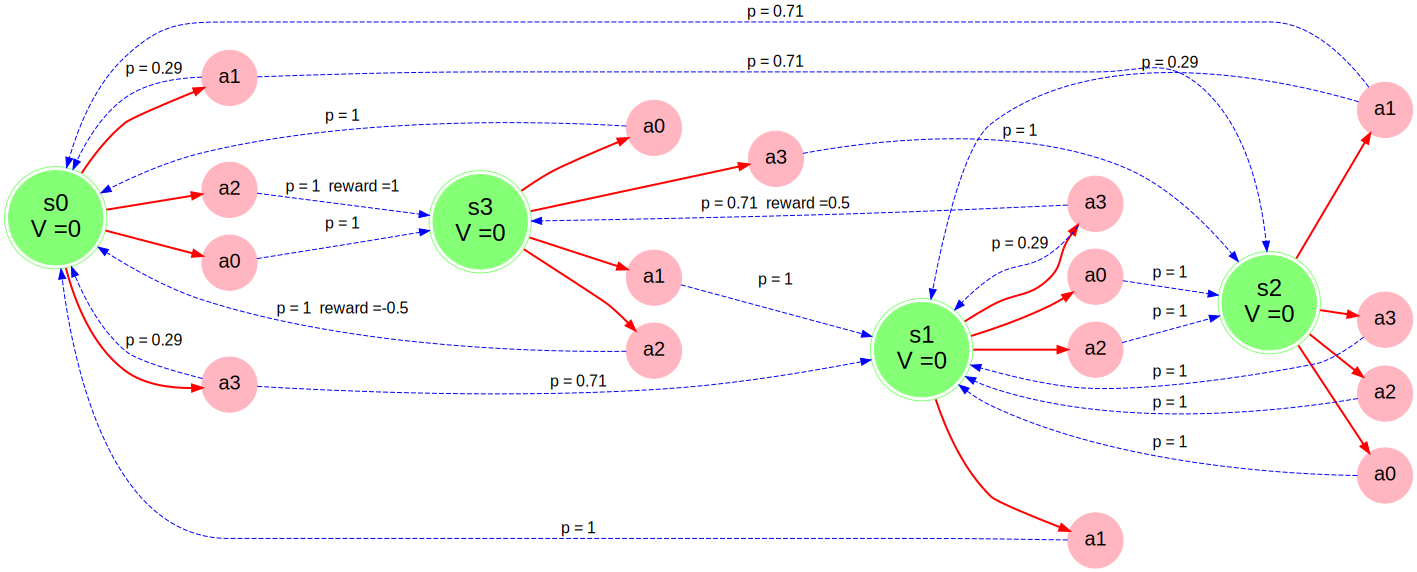

iter    0   |   diff: 1.00000   |   V(s0) = 0.000   V(s1) = 0.000   V(s2) = 0.000   V(s3) = 0.000
iter    1   |   diff: 0.75000   |   V(s0) = 1.000   V(s1) = 0.355   V(s2) = 0.000   V(s3) = 0.000
iter    2   |   diff: 0.56250   |   V(s0) = 1.000   V(s1) = 0.750   V(s2) = 0.610   V(s3) = 0.750
iter    3   |   diff: 0.42188   |   V(s0) = 1.562   V(s1) = 0.917   V(s2) = 0.696   V(s3) = 0.750
iter    4   |   diff: 0.31641   |   V(s0) = 1.562   V(s1) = 1.172   V(s2) = 1.032   V(s3) = 1.172
iter    5   |   diff: 0.23730   |   V(s0) = 1.879   V(s1) = 1.234   V(s2) = 1.087   V(s3) = 1.172
iter    6   |   diff: 0.17798   |   V(s0) = 1.879   V(s1) = 1.409   V(s2) = 1.269   V(s3) = 1.409
iter    7   |   diff: 0.13348   |   V(s0) = 2.057   V(s1) = 1.412   V(s2) = 1.307   V(s3) = 1.409
iter    8   |   diff: 0.10011   |   V(s0) = 2.057   V(s1) = 1.543   V(s2) = 1.402   V(s3) = 1.543
iter    9   |   diff: 0.07508   |   V(s0) = 2.157   V(s1) = 1.543   V(s2) = 1.431   V(s3) = 1.543
iter   10   |   diff

In [14]:
# parameters
gamma = 0.75           # discount for MDP
num_iter = 100         # maximum iterations, excluding initialization
# stop VI if new values are this close to old values (or closer)
min_difference = 0.02

# initialize V(s)
state_values = {s: 0 for s in mdp.get_all_states()}

if has_graphviz:
    display(plot_graph_with_state_values(mdp, state_values))

for i in range(num_iter):

    # Compute new state values using the functions defined above.
    # It must be a dict {state : float V_new(state)}
    new_state_values = {}
    for s in mdp.get_all_states():
      nsv = get_new_state_value(mdp, state_values, s, gamma)
      a = list(nsv)[0]
      v = nsv[a]
      new_state_values[s] = v

    #assert isinstance(new_state_values, dict)

    # Compute difference
    diff = max(abs(new_state_values[s] - state_values[s]) for s in mdp.get_all_states())
    print("iter %4i   |   diff: %6.5f   |   " % (i, diff), end="")
    print('   '.join("V(%s) = %.3f" % (s, v) for s, v in state_values.items()))
    state_values = new_state_values

    if diff < min_difference:
        print("Terminated")
        break

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


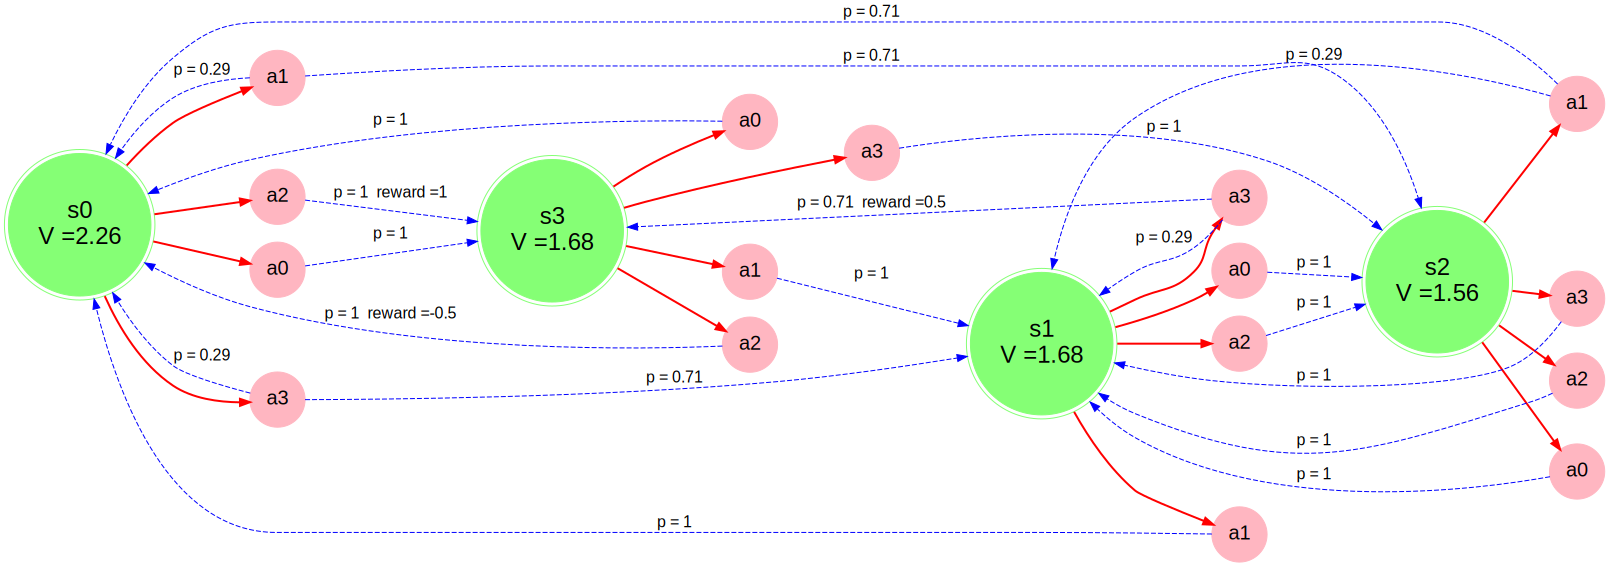

In [15]:
if has_graphviz:
    display(plot_graph_with_state_values(mdp, state_values))

In [16]:
print("Final state values:", state_values)

#assert abs(state_values['s0'] - 3.781) < 0.01
#assert abs(state_values['s1'] - 7.294) < 0.01
#assert abs(state_values['s2'] - 4.202) < 0.01

Final state values: {'s0': 2.2628054954111576, 's1': 1.6837406605482101, 's2': 1.5616694626584648, 's3': 1.6837406605482101}


/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


### **Step 3:** Using the next states (from Step 2) to find the optimal actions

In [17]:
def get_optimal_action(mdp, state_values, state, gamma):
    # Finds optimal action using formula above. 
    if mdp.is_terminal(state):
        return None

    nsv = get_new_state_value(mdp, state_values, state, gamma)
    a = list(nsv)[0]

    return a

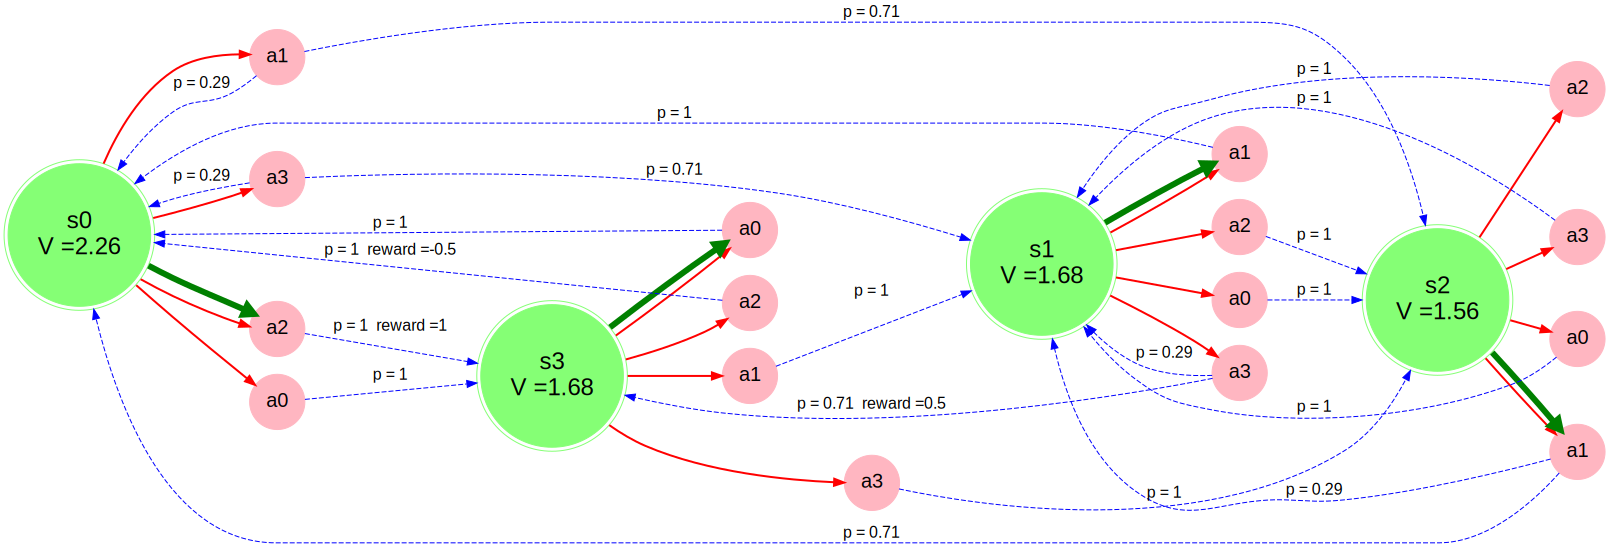

In [19]:
if has_graphviz:
    display(plot_graph_optimal_strategy_and_state_values(mdp, state_values, get_action_value))

### **Measure agent's average reward**

In [20]:
s = mdp.reset()
rewards = []
gamma=0.75

for _ in range(1000):
    s, r, done, _ = mdp.step(get_optimal_action(mdp, state_values, s, gamma))
    rewards.append(r)

print("average reward: ", np.mean(rewards))

assert(0.40 < np.mean(rewards) < 0.55)

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


average reward:  0.5
